# ตัวอย่าง การทำ Regression Analysis


ทำการเชื่อม Google Drive

In [1]:
# from google.colab import drive

# drive.mount('/content/gdrive')

ระบุ Folder ใน Drive ที่ต้องการใช้

In [2]:
import os
# os.chdir("/content/gdrive/My Drive/Colab Notebooks")

os.chdir("/Users/phutharesuanwachirapisut/Programming/Dataset")


อ่านข้อมูลจากไฟล์

In [3]:
# Load libraries
import pandas as pd

dataset = pd.read_csv("YearSalary.csv")  #อ่านข้อมูล
dataset.head()  #แสดงตัวอย่าง  5 ระเบียนแรก

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


แบ่งข้อมูลเป็น Features และ Target value
โดย Features จะเรียกว่า Independent variable ในตัวอย่างนี้คือ ประสบการณ์ทำงาน

*   โดย Features จะเรียกอีกชื่อว่า Independent variable ในตัวอย่างนี้คือ YearExperience : ประสบการณ์ทำงาน (ปี)
*   ในขณะที่ Target value จะเรียกอีกชื่อว่า Dependent variable ในตัวอย่างนี้คือ Salary : เงินเดือน

In [4]:
X = dataset['YearsExperience'].values.reshape(-1, 1)
y = dataset['Salary'].values.reshape(-1, 1)
  # หรือ
#X = dataset.iloc[ : , 0].values.reshape(-1, 1)
#y = dataset.iloc[ :, 2].values.reshape(-1, 1)

ทำการแบ่ง Training set และ Testing set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

สร้างโมเดล Regression Analysis

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)  #trainning

# print the model that was fitted (the regression formula)
print("Salary = ", model.coef_[0], "* YearsExperience + " , model.intercept_)

Salary =  [9271.60389051] * YearsExperience +  [26810.30871569]


การทดสอบผลทำนายผลจากโมเดลที่สร้างขึ้น

In [7]:
y_pred = model.predict(X_test)
print(X_test)
print(y_test)
print(y_pred)

[[3.2]
 [2. ]
 [5.3]
 [2.2]
 [9.5]
 [5.9]]
[[ 54445]
 [ 43525]
 [ 83088]
 [ 39891]
 [116969]
 [ 81363]]
[[ 56479.44116531]
 [ 45353.5164967 ]
 [ 75949.80933537]
 [ 47207.8372748 ]
 [114890.5456755 ]
 [ 81512.77166968]]


สร้างกราฟแสดงความสัมพันธ์ของข้อมูล YearExperience : ประสบการณ์ทำงาน (ปี) และ Salary : เงินเดือน

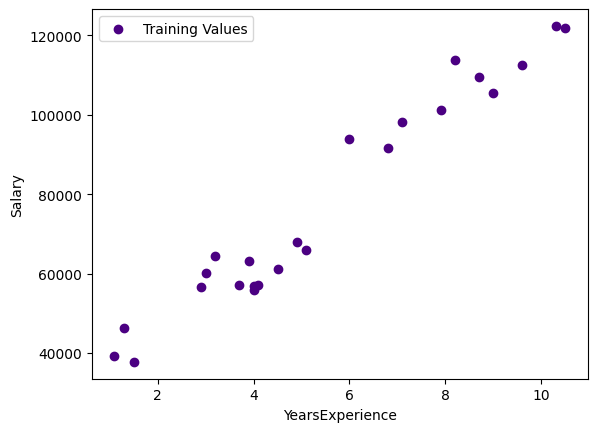

In [8]:
import matplotlib.pyplot as plt
# plot the original values
plt.scatter(X_train, y_train, c='indigo', label='Training Values')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

คำนวณ Salary : เงินเดือน จาก Linear Regression Model
 โดยกำหนดค่า x มีค่า = 0 หรือYearExperience : ประสบการณ์ทำงาน (ปี) = 0

*   กำหนดค่า x มีค่า = 0 หรือ YearExperience : ประสบการณ์ทำงาน (ปี) = 0 เพื่อแสดงจุดตัดแกน y หรือ Salary : เงินเดือน เริ่มต้นหากไม่มีประสบการณ์
*   กำหนดค่า x อีกหนึ่งค่าโดยใช้ค่า x ที่เป็นค่าที่มากที่สุดจากข้อมูลสอน (Training Dataset)

In [9]:
# Calculate the predited values
xfit=[[0],[10]]
yfit=model.predict(xfit)

แสดงกราฟเส้นเพื่อแสดงสมการเส้นตรงที่ได้จากการสร้าง Linear Regression Model

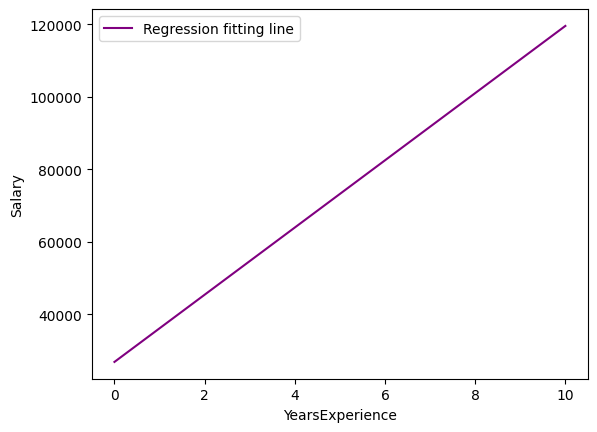

In [10]:
# plot the predicted values
plt.plot(xfit,yfit,c='purple', label='Regression fitting line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

แสดงข้อมูลจริงใน Training Data set เทียบกับผลการทำนายด้วย Linear Regression Model ที่สร้างขึ้น

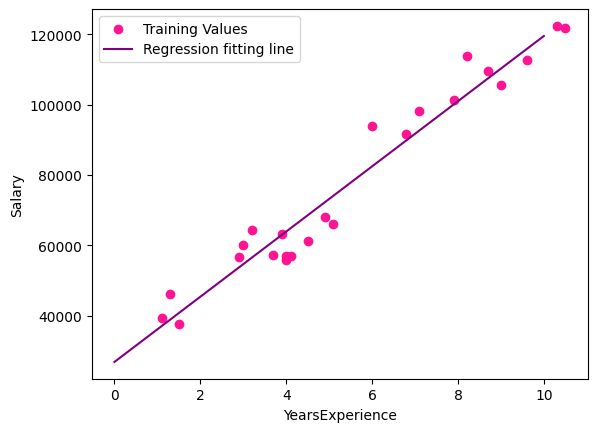

In [11]:
# plot the original training values
plt.scatter(X_train, y_train, c='deeppink', label='Training Values')
# plot the predicted values
plt.plot(xfit,yfit,c='purple', label='Regression fitting line')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

แสดงข้อมูลจริงใน Testing Data set เทียบกับผลการทำนายด้วย Linear Regression Model ที่สร้างขึ้น

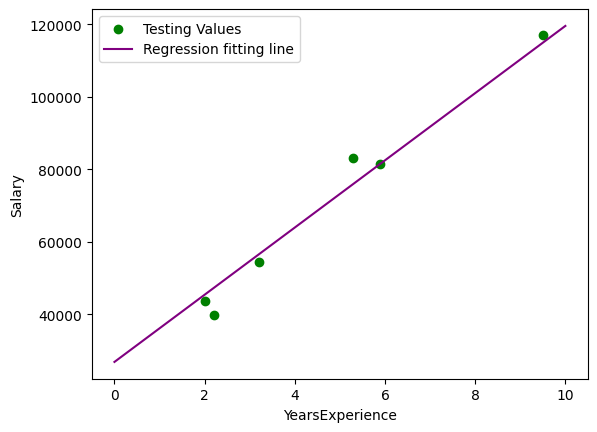

In [12]:
# plot the original testing values
plt.scatter(X_test, y_test, c='green', label='Testing Values')
# plot the predicted values
plt.plot(xfit,yfit,c='purple', label='Regression fitting line')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

ประเมินผลประสิทธิภาพของโมเดล

In [13]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

# evaluate using different measures
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
# mae = sum(abs(y_test- y_pred))/ len(y_test)
r2 = r2_score(y_test, y_pred)
print("==== The evaluation results ====")
print('MAE: ',mae)
print('MSE: ',mse)
print('RMSE: ',sqrt(mse))
print('R^2: ',r2)

==== The evaluation results ====
MAE:  3424.3685992701307
MSE:  19385783.506071847
RMSE:  4402.928969001413
R^2:  0.9732968983826664


ทดสอบการทำงานของโมเดลด้วยการป้อนข้อมูลตัวแปร x หรือ YearsExperience ผ่านโปรแกรม

In [14]:
# ทดลองการทำนายผลของโมเดลด้วยการป้อนประสบการณ์การทำงาน
sample = [[0.5]] # เป็นตัวแปร x
y_pred = model.predict(sample)
print(y_pred)

[[31446.11066094]]


ทดสอบการทำงานของโมเดลด้วยการป้อนข้อมูลตัวแปร x หรือ YearsExperience ผ่านฟอร์ม

In [15]:

YearsExperience = 0.5 #@param {type:"slider", min:0, max:10, step:0.1}


In [16]:
TestingData = [[YearsExperience]]

prediction = model.predict(TestingData)
print(prediction)

[[31446.11066094]]
